In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, silhouette_score
import seaborn as sns
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "-1"  # Set to 1 or the desired number of cores


In [6]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target.astype(int)  # Convert target to integer type
print(f"Shape of dataset: {X.shape}")


Shape of dataset: (70000, 784)


In [7]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions (e.g., 50 components)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

print(f"Shape of dataset after PCA: {X_pca.shape}")


Shape of dataset after PCA: (70000, 50)


In [10]:
# Apply GMM clustering
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)
gmm.fit(X_pca)

# Predict cluster labels
cluster_labels = gmm.predict(X_pca)

# Check the unique cluster labels
print(f"Cluster labels: {np.unique(cluster_labels)}")


Cluster labels: [0 1 2 3 4 5 6 7 8 9]


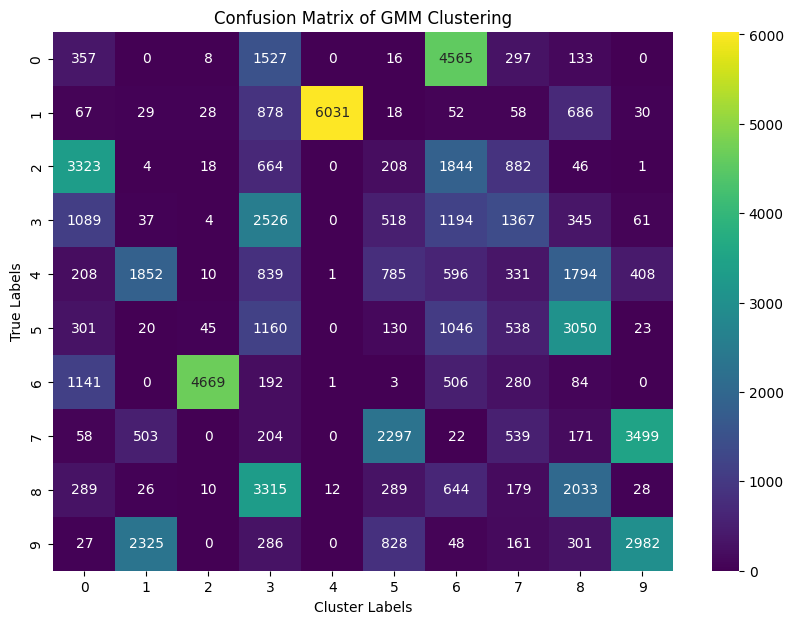

In [9]:
# Create a confusion matrix to compare the actual labels with the clustered labels
conf_mat = confusion_matrix(y, cluster_labels)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="viridis")
plt.title('Confusion Matrix of GMM Clustering')
plt.xlabel('Cluster Labels')
plt.ylabel('True Labels')
plt.show()


In [11]:
# Compute silhouette score to evaluate clustering
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: -0.004756259367178945


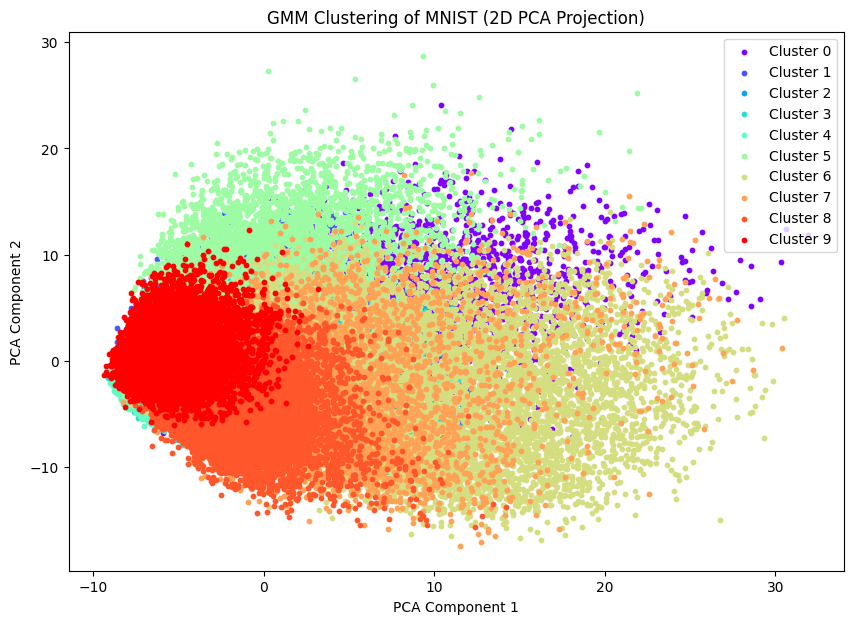

In [12]:
# Reduce dataset to 2D for visualization
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

# Create a scatter plot of the clustered data
plt.figure(figsize=(10, 7))

# Plot all points, color by cluster label
unique_labels = np.unique(cluster_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    class_member_mask = (cluster_labels == k)
    
    # Plot data points in each cluster
    xy = X_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=10, c=[col], label=f"Cluster {k}")

plt.title('GMM Clustering of MNIST (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='best')
plt.show()
